# links

https://www.analyticsvidhya.com/blog/2021/07/detecting-fake-news-with-natural-language-processing/

https://www.analyticsvidhya.com/blog/2021/03/introduction-to-gated-recurrent-unit-gru/

https://medium.com/@saitejaponugoti/stop-words-in-nlp-5b248dadad47

https://thepythoncode.com/article/fake-news-classification-in-python

https://dl.acm.org/doi/10.1016/j.procs.2024.03.237

https://www.youtube.com/watch?app=desktop&v=rdz0UqQz5Sw&t=0s

https://medium.com/@rajvir.ahmed.shuvo/improving-fake-news-detection-a-journey-through-text-classification-c521b1509cee

https://medium.com/@carmenscartezini/fake-news-classification-tensorflow-x-pytorch-2a8f471a3713

https://towardsdatascience.com/detecting-fake-news-with-and-without-code-dd330ed449d9

https://towardsdatascience.com/turbo-charge-your-spacy-nlp-pipeline-551435b664ad



In [1]:
import pandas as pd

train = pd.read_parquet('data/train.parquet')
display(train)

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...
20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   20242 non-null  object
 1   author  18843 non-null  object
 2   text    20761 non-null  object
 3   label   20800 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 650.1+ KB


In [3]:
train.isnull().sum()

title      558
author    1957
text        39
label        0
dtype: int64

In [4]:
cleaned_df = train.dropna(subset=["title", "text"])
cleaned_df.info()

cleaned_df["author"] = cleaned_df["author"].fillna("Unknown")
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20203 entries, 0 to 20799
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   20203 non-null  object
 1   author  18285 non-null  object
 2   text    20203 non-null  object
 3   label   20203 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 789.2+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 20203 entries, 0 to 20799
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   20203 non-null  object
 1   author  20203 non-null  object
 2   text    20203 non-null  object
 3   label   20203 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 789.2+ KB


/tmp/ipykernel_299/2309681875.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["author"] = cleaned_df["author"].fillna("Unknown")


In [5]:
cleaned_df["merged_text"] = cleaned_df["title"] + " " + cleaned_df["text"]
display(cleaned_df["merged_text"])

/tmp/ipykernel_299/1132859349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["merged_text"] = cleaned_df["title"] + " " + cleaned_df["text"]


0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        FLYNN: Hillary Clinton, Big Woman on Campus - ...
2        Why the Truth Might Get You Fired Why the Trut...
3        15 Civilians Killed In Single US Airstrike Hav...
4        Iranian woman jailed for fictional unpublished...
                               ...                        
20795    Rapper T.I.: Trump a ’Poster Child For White S...
20796    N.F.L. Playoffs: Schedule, Matchups and Odds -...
20797    Macy’s Is Said to Receive Takeover Approach by...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799    What Keeps the F-35 Alive   David Swanson is a...
Name: merged_text, Length: 20203, dtype: object

In [6]:
cleaned_df.loc[:, "merged_text"] = (
    cleaned_df["merged_text"]
    .str.lower()
    .replace(r'http[\w:/\.]+', ' ', regex=True)  # Remove URLs
    .replace(r"[^a-z\s'’]", " ", regex=True)      # Remove everything except lowercase letters, spaces, and apostrophes
    .replace(r'\s\s+', ' ', regex=True)         # Collapse multiple spaces
    .str.strip()                                # Remove leading/trailing spaces
)
display(cleaned_df["merged_text"])

0        house dem aide we didn’t even see comey’s lett...
1        flynn hillary clinton big woman on campus brei...
2        why the truth might get you fired why the trut...
3        civilians killed in single us airstrike have b...
4        iranian woman jailed for fictional unpublished...
                               ...                        
20795    rapper t i trump a ’poster child for white sup...
20796    n f l playoffs schedule matchups and odds the ...
20797    macy’s is said to receive takeover approach by...
20798    nato russia to hold parallel exercises in balk...
20799    what keeps the f alive david swanson is an aut...
Name: merged_text, Length: 20203, dtype: object

In [7]:
import contractions
cleaned_df["merged_text"] = cleaned_df["merged_text"].apply(
    lambda x: contractions.fix(x) if isinstance(x, str) else x
)
display(cleaned_df["merged_text"])

/tmp/ipykernel_299/1282668482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["merged_text"] = cleaned_df["merged_text"].apply(


0        house dem aide we did not even see comey’s let...
1        flynn hillary clinton big woman on campus brei...
2        why the truth might get you fired why the trut...
3        civilians killed in single us airstrike have b...
4        iranian woman jailed for fictional unpublished...
                               ...                        
20795    rapper t i trump a ’poster child for white sup...
20796    n f l playoffs schedule matchups and odds the ...
20797    macy’s is said to receive takeover approach by...
20798    nato russia to hold parallel exercises in balk...
20799    what keeps the f alive david swanson is an aut...
Name: merged_text, Length: 20203, dtype: object

In [8]:
cleaned_df['merged_text'] = cleaned_df['merged_text'].replace(r"’", "", regex=True)
display(cleaned_df["merged_text"])


/tmp/ipykernel_299/449746528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['merged_text'] = cleaned_df['merged_text'].replace(r"’", "", regex=True)


0        house dem aide we did not even see comeys lett...
1        flynn hillary clinton big woman on campus brei...
2        why the truth might get you fired why the trut...
3        civilians killed in single us airstrike have b...
4        iranian woman jailed for fictional unpublished...
                               ...                        
20795    rapper t i trump a poster child for white supr...
20796    n f l playoffs schedule matchups and odds the ...
20797    macys is said to receive takeover approach by ...
20798    nato russia to hold parallel exercises in balk...
20799    what keeps the f alive david swanson is an aut...
Name: merged_text, Length: 20203, dtype: object

In [2]:
import spacy
from spacy.cli import download

# Download the SpaCy model if not already installed
model_name = "en_core_web_sm"

try:
    spacy_model = spacy.load(model_name)
    print(f"Successfully loaded model: {model_name}")
except OSError:
    print(f"Model '{model_name}' not found. Downloading...")
    download(model_name)
    spacy_model = spacy.load(model_name)
    print(f"Successfully downloaded and loaded model: {model_name}")

Successfully loaded model: en_core_web_sm


In [10]:
stopwords = spacy_model.Defaults.stop_words
print(stopwords)

{'beside', "'ve", 'whole', 'get', 'your', 'from', 'though', 'part', 'ourselves', 're', 'ten', 'three', 'say', 'therein', 'also', 'sixty', 'regarding', 'first', 'make', 'myself', '’ll', 'thereupon', 'above', 'nowhere', 'without', 'a', 'off', 'elsewhere', 'among', 'go', 'whose', 'after', 'bottom', 'herself', 'third', 'due', 'yours', 'besides', 'four', 'am', '’ve', 'by', 'seeming', 'very', 'always', 'five', 'own', 'six', 'up', '‘ll', 'herein', 'does', 'something', 'became', 'these', 'should', 'unless', 'last', 'really', 'their', 'hundred', 'down', 'seems', 'towards', "'m", 'whither', 'there', 'was', 'hers', 'upon', '‘m', 'forty', "'d", 'everyone', 'through', 'latter', '‘ve', 'put', 'some', 'ours', 'via', 'how', 'did', 'together', 'whereafter', 'thence', 'now', 'whoever', 'many', 'someone', 'hereafter', 'between', 'thereafter', 'might', 'often', 'out', '’s', 'why', 'afterwards', 'yet', 'with', "'s", 'using', 'anyone', 'who', 'moreover', 'anyway', 'the', 'further', 'eleven', "'ll", 'over', 

In [11]:
def remove_stopwords(text):
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token.lower() not in stopwords]
    return ' '.join(filtered_tokens)

cleaned_df['cleaned_text'] = cleaned_df['merged_text'].apply(remove_stopwords)
display(cleaned_df["cleaned_text"])

/tmp/ipykernel_299/1133516218.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['cleaned_text'] = cleaned_df['merged_text'].apply(remove_stopwords)


0        house dem aide comeys letter jason chaffetz tw...
1        flynn hillary clinton big woman campus breitba...
2        truth fired truth fired october tension intell...
3        civilians killed single airstrike identified v...
4        iranian woman jailed fictional unpublished sto...
                               ...                        
20795    rapper t trump poster child white supremacy ra...
20796    n f l playoffs schedule matchups odds new york...
20797    macys said receive takeover approach hudsons b...
20798    nato russia hold parallel exercises balkans na...
20799    keeps f alive david swanson author activist jo...
Name: cleaned_text, Length: 20203, dtype: object

#### Das muss nochmal überprüft werden. Es kommt mir so vor, als würde der noch nicht die Wortstämme finden

In [12]:
from joblib import Parallel, delayed
import os

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
nlp.add_pipe('sentencizer')

# Define stopwords (example: ensure it's a valid list or set of words)
from spacy.lang.en.stop_words import STOP_WORDS
stopwords = STOP_WORDS  # Use SpaCy's built-in stopwords, or customize if needed

# Function to lemmatize a single document
def lemmatize_doc(doc):
    return ' '.join(
        tok.lemma_.lower()
        for tok in doc
        if tok.is_alpha and tok.text.lower() not in stopwords
    )

# Helper to divide the dataset into chunks
def chunker(iterable, total_length, chunksize):
    return (iterable[pos: pos + chunksize] for pos in range(0, total_length, chunksize))

# Flatten a list of lists
def flatten(list_of_lists):
    return [item for sublist in list_of_lists for item in sublist]

# Process a chunk of texts in parallel
def process_chunk(texts):
    return [lemmatize_doc(doc) for doc in nlp.pipe(texts, batch_size=20)]

# Main preprocessing function for parallel processing
def preprocess_parallel(texts, chunksize=100):
    executor = Parallel(n_jobs=-1, backend='multiprocessing', prefer="processes")
    do = delayed(process_chunk)
    tasks = (do(chunk) for chunk in chunker(texts, len(texts), chunksize=chunksize))
    result = executor(tasks)
    return flatten(result)

In [13]:
cleaned_df['preproc_parallel'] = preprocess_parallel(cleaned_df['cleaned_text'], chunksize=1000)

/tmp/ipykernel_299/3454132838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['preproc_parallel'] = preprocess_parallel(cleaned_df['cleaned_text'], chunksize=1000)


In [14]:
display(cleaned_df['preproc_parallel'])

0        house dem aide comey letter jason chaffetz twe...
1        flynn hillary clinton big woman campus breitba...
2        truth fire truth fire october tension intellig...
3        civilian kill single airstrike identify video ...
4        iranian woman jail fictional unpublished story...
                               ...                        
20795    rapper t trump poster child white supremacy ra...
20796    n f l playoff schedule matchup odd new york ti...
20797    macys say receive takeover approach hudson bay...
20798    nato russia hold parallel exercise balkans nat...
20799    keep f alive david swanson author activist jou...
Name: preproc_parallel, Length: 20203, dtype: object

/tmp/ipykernel_391/2292561945.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_length'] = df['preproc_parallel'].apply(len)


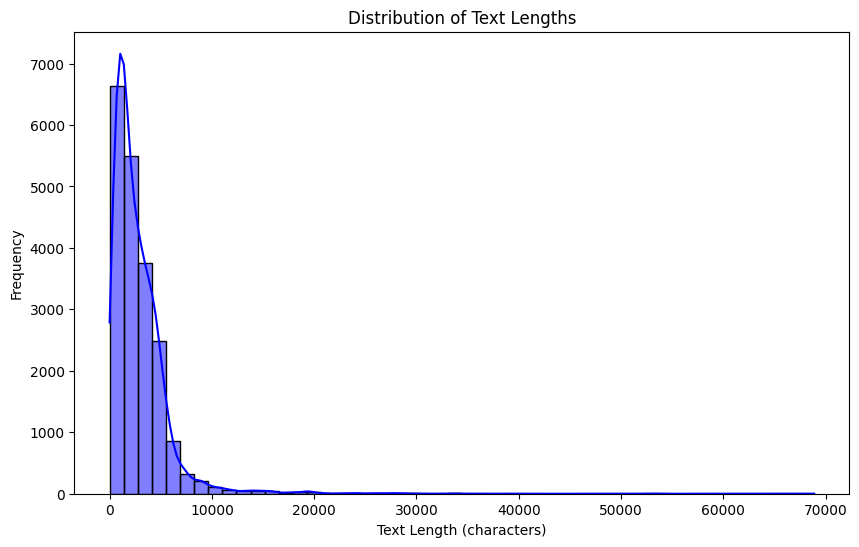

count    20203.000000
mean      2826.122705
std       2931.423187
min          0.000000
25%       1093.000000
50%       2154.000000
75%       3829.500000
max      68883.000000
Name: text_length, dtype: float64


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is a Pandas DataFrame with a column 'text' containing cleaned articles
df = cleaned_df

# Calculate text lengths
df['text_length'] = df['preproc_parallel'].apply(len)

# Plot text length distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True, color='blue')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length (characters)')
plt.ylabel('Frequency')
plt.show()

# Summary statistics for text lengths
length_summary = df['text_length'].describe()
print(length_summary)


Top 20 Most Common Words:
say: 91396
mr: 66304
trump: 55334
new: 37392
people: 37067
year: 33484
clinton: 29662
like: 27513
state: 26875
time: 26423
president: 26410
s: 22708
know: 21169
go: 20950
come: 19574
work: 18397
government: 18232
day: 18051
country: 16591
american: 16394


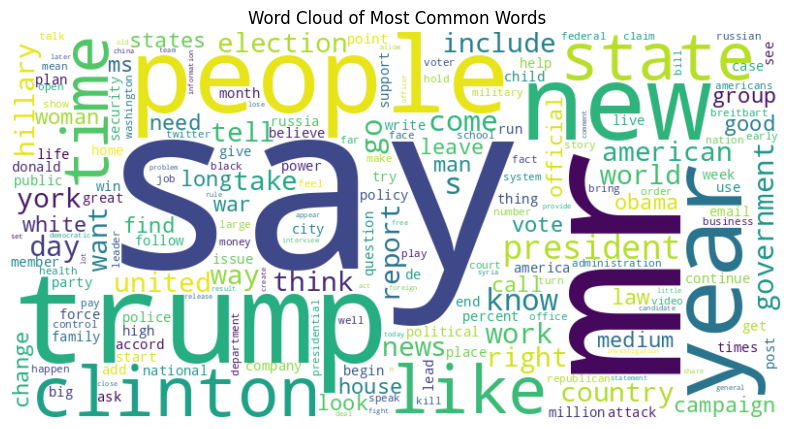

In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming your dataset is a Pandas DataFrame with a column 'cleaned_text' containing lemmatized and cleaned texts
import pandas as pd

df = cleaned_df

# Split cleaned and lemmatized texts into words and flatten into a single list
all_words = [word for text in df['preproc_parallel'] for word in text.split()]

# Calculate word frequencies
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(20)

# Display most common words
print("Top 20 Most Common Words:")
for word, count in most_common_words:
    print(f"{word}: {count}")

# Word Cloud Visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words')
plt.show()


/tmp/ipykernel_391/2725689417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unique_words'] = df['preproc_parallel'].apply(lambda tokens: len(set(tokens)))
/tmp/ipykernel_391/2725689417.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vocabulary_richness'] = df['unique_words'] / df['text_length']


Vocabulary Richness Summary:
count    20159.000000
mean         0.026166
std          0.057730
min          0.000392
25%          0.006999
50%          0.012262
75%          0.023378
max          1.000000
Name: vocabulary_richness, dtype: float64


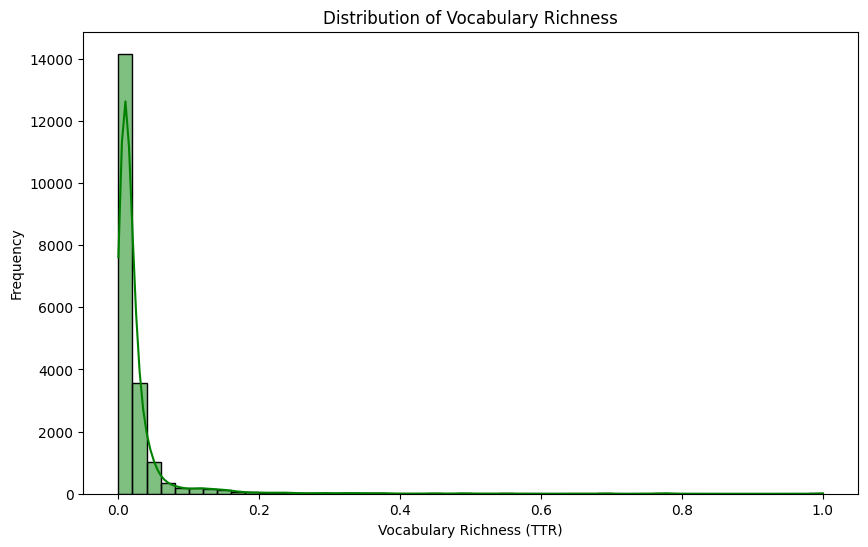

In [24]:
# Calculate type-token ratio (TTR) for vocabulary richness
df['unique_words'] = df['preproc_parallel'].apply(lambda tokens: len(set(tokens)))
df['vocabulary_richness'] = df['unique_words'] / df['text_length']

# Display summary statistics
richness_summary = df['vocabulary_richness'].describe()
print("Vocabulary Richness Summary:")
print(richness_summary)

# Plot vocabulary richness
plt.figure(figsize=(10, 6))
sns.histplot(df['vocabulary_richness'], bins=50, kde=True, color='green')
plt.title('Distribution of Vocabulary Richness')
plt.xlabel('Vocabulary Richness (TTR)')
plt.ylabel('Frequency')
plt.show()


In [1]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Assuming `texts` is a list of preprocessed (lemmatized) texts
def get_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']  # Compound score gives an overall sentiment (range: -1 to 1)

# Apply to the whole dataset
df['sentiment'] = df['preproc_parallel'].apply(get_sentiment)

# Categorize sentiment into positive, negative, neutral
def categorize_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)

# Example: Show the distribution of sentiments
print(df['sentiment_category'].value_counts())


LookupError: 
**********************************************************************
  Resource [93mvader_lexicon[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('vader_lexicon')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93msentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt[0m

  Searched in:
    - '/home/nikl/nltk_data'
    - '/home/nikl/programming/fhdw/knowledge_engineering_ausarbeitung/fakenews_detection/.venv/nltk_data'
    - '/home/nikl/programming/fhdw/knowledge_engineering_ausarbeitung/fakenews_detection/.venv/share/nltk_data'
    - '/home/nikl/programming/fhdw/knowledge_engineering_ausarbeitung/fakenews_detection/.venv/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


/tmp/ipykernel_391/1074851675.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vocabulary_richness'] = df['preproc_parallel'].apply(calculate_vocabulary_richness)
/tmp/ipykernel_391/1074851675.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y='vocabulary_richness', palette='Set2')


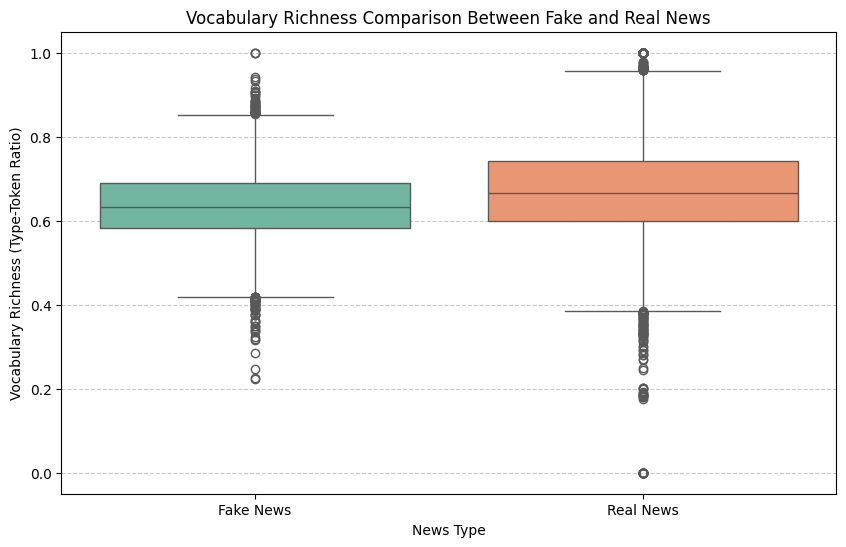

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate vocabulary richness (Type-Token Ratio)
def calculate_vocabulary_richness(text):
    words = text.split()
    unique_words = set(words)
    if len(words) == 0:
        return 0
    return len(unique_words) / len(words)

# Assuming you have a dataframe `df` with columns 'text' (lemmatized text) and 'label' (fake/real)
# Compute vocabulary richness for each article
df['vocabulary_richness'] = df['preproc_parallel'].apply(calculate_vocabulary_richness)

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='vocabulary_richness', palette='Set2')
plt.title('Vocabulary Richness Comparison Between Fake and Real News')
plt.xlabel('News Type')
plt.ylabel('Vocabulary Richness (Type-Token Ratio)')
plt.xticks(ticks=[0, 1], labels=['Fake News', 'Real News'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [30]:
import spacy
import networkx as nx
import pandas as pd
from itertools import combinations
from collections import Counter
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

# Parallelized function to extract entity pairs
def extract_entity_pairs(text, model_name='en_core_web_sm'):
    # Load the model in each parallel worker
    nlp = spacy.load(model_name)
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents if ent.label_ in ['PERSON', 'ORG', 'GPE', 'DATE']]
    return list(combinations(entities, 2))  # Generate all pairs of entities

def parallel_entity_extraction(texts, n_jobs=-1):
    return Parallel(n_jobs=n_jobs)(delayed(extract_entity_pairs)(text) for text in texts)
def count_entity_pairs(entity_pairs):
    return Counter(entity_pairs)

# Function to build the graph from the counted entity pairs
def build_semantic_network_parallel(df, text_column, n_jobs=-1):
    # Extract entity pairs in parallel
    entity_pairs = parallel_entity_extraction(df[text_column], n_jobs=n_jobs)
    
    # Flatten the list of lists of entity pairs
    flattened_entity_pairs = [item for sublist in entity_pairs for item in sublist]
    
    # Count entity pair occurrences in parallel
    pair_counts = Parallel(n_jobs=n_jobs)(delayed(count_entity_pairs)(flattened_entity_pairs))
    
    # Create the graph
    G = nx.Graph()
    for (entity1, entity2), weight in pair_counts[0].items():  # Since we have only one Counter, use the first result
        G.add_edge(entity1, entity2, weight=weight)

    return G

# Function to visualize the graph
def visualize_graph(G, title="Semantic Network of Entities"):
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, k=0.5)  # Spring layout for visualization
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold')
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(title)
    plt.show()


In [31]:
# Build the semantic network using parallel processing
semantic_network = build_semantic_network_parallel(df, text_column="cleaned_text", n_jobs=-1)

# Visualize the network
visualize_graph(semantic_network)

: 

In [24]:
import torch
from transformers.file_utils import is_tf_available, is_torch_available
from transformers import BertTokenizerFast, BertForSequenceClassification, DistilBertTokenizer, DistilBertForSequenceClassification
from transformers import Trainer, TrainingArguments
import numpy as np
from sklearn.model_selection import train_test_split

import random

In [25]:
def set_seed(seed: int):
    """
    Helper function for reproducible behavior to set the seed in ``random``, ``numpy``, ``torch`` and/or ``tf`` (if
    installed).

    Args:
        seed (:obj:`int`): The seed to set.
    """
    random.seed(seed)
    np.random.seed(seed)
    if is_torch_available():
        torch.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        # ^^ safe to call this function even if cuda is not available

set_seed(1)

In [26]:
# Find the longest string in the column
longest_string = cleaned_df['preproc_parallel'].loc[cleaned_df['preproc_parallel'].str.len().idxmax()]

print(f"The longest string is: {longest_string}")
print(f"Length of the longest string: {len(longest_string)}")


The longest string is: hard working american vs government parasite hard working american vs government parasite michael snyder april th lifestyle choice produces better results hard working american government parasite actually look cold hard numbers surprise america today deeply penalize hard work greatly reward government dependence live liberal area country know game system entirely possible live comfortable existence working fact americans living government benefits decades people actually plan lives exactly need qualify benefits possible america rapidly turning european style socialist welfare state destroying nation socially financially war poverty began debt absolutely exploded poor people country obviously working wrong deeply believe having compassion going tough times having safety net care single person nation going food sleeping streets america today absolutely ridiculous people climbing aboard safety net point astounding percent americans live home receives form governmen

In [31]:
# the model we gonna train, base uncased BERT
# check text classification models here: https://huggingface.co/models?filter=text-classification
model_name = "distilbert-base-uncased"
# max sequence length for each document/sentence sample
max_length = 512


In [32]:
# load the tokenizer
tokenizer = DistilBertTokenizer.from_pretrained(model_name, do_lower_case=True)

In [33]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
train_texts, valid_texts, train_label, valid_label = train_test_split(
    cleaned_df['preproc_parallel'], 
    cleaned_df['label'], 
    test_size=0.2, 
    random_state=42
)

# Display the shapes of the resulting datasets
print(f"Training data shape: {train_texts.shape}")
print(f"Validation data shape: {valid_texts.shape}")
print(f"Training labels shape: {train_label.shape}")
print(f"Validation labels shape: {valid_label.shape}")

Training data shape: (16162,)
Validation data shape: (4041,)
Training labels shape: (16162,)
Validation labels shape: (4041,)


In [34]:
display(train_texts)

8139     ny times sanctuary city new york times piece s...
12358    stake trumps proposed e p cuts new york times ...
9562     rick rule broadcast interview available views ...
5979     hillary clinton cancels public events vanishes...
19059    trump declared winner jon rappoport polls clos...
                               ...                        
11625    chaiwali indian restaurant feels like home new...
12329    recipe mouth watering cauliflower coconut oil ...
5553     las cajetillas de tabaco emitir n m sica de me...
885      open borders groups gird h b fights open borde...
16251    eighty wealthy new yorkers ask state governmen...
Name: preproc_parallel, Length: 16162, dtype: object

In [35]:
train_texts_list = train_texts.tolist()
valid_texts_list = valid_texts.tolist()
train_labels_list = train_label.tolist()
valid_labels_list = valid_label.tolist()

In [38]:
# tokenize the dataset, truncate when passed `max_length`, 
# and pad with 0's when less than `max_length`
train_encodings = tokenizer(train_texts_list, truncation=True, padding=True, max_length=max_length)
valid_encodings = tokenizer(valid_texts_list, truncation=True, padding=True, max_length=max_length)

In [39]:
class NewsGroupsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor([self.labels[idx]])
        return item

    def __len__(self):
        return len(self.labels)

# convert our tokenized data into a torch Dataset
train_dataset = NewsGroupsDataset(train_encodings, train_labels_list)
valid_dataset = NewsGroupsDataset(valid_encodings, valid_labels_list)

In [40]:
# load the model
model = DistilBertForSequenceClassification.from_pretrained(model_name, num_labels=2)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [41]:
from sklearn.metrics import accuracy_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  # calculate accuracy using sklearn's function
  acc = accuracy_score(labels, preds)
  return {
      'accuracy': acc,
  }

In [42]:
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=1,              # total number of training epochs
    per_device_train_batch_size=10,  # batch size per device during training
    per_device_eval_batch_size=20,   # batch size for evaluation
    warmup_steps=100,                # number of warmup steps for learning rate scheduler
    logging_dir='./logs',            # directory for storing logs
    load_best_model_at_end=True,     # load the best model when finished training (default metric is loss)
    # but you can specify `metric_for_best_model` argument to change to accuracy or other metric
    logging_steps=200,               # log & save weights each logging_steps
    save_steps=200,
    eval_strategy="steps",     # evaluate each `logging_steps`
)

In [43]:
trainer = Trainer(
    model=model,                         # the instantiated Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=valid_dataset,          # evaluation dataset
    compute_metrics=compute_metrics,     # the callback that computes metrics of interest
)

In [44]:
# train the model
trainer.train()

Step,Training Loss,Validation Loss,Accuracy
200,0.446400,0.119856,0.959911
400,0.161400,0.109896,0.968572
600,0.108600,0.125902,0.970552
800,0.110800,0.108161,0.973026
1000,0.084000,0.100355,0.976738
1200,0.081200,0.084826,0.978966
1400,0.076100,0.076353,0.980945
1600,0.067500,0.072483,0.981935


TrainOutput(global_step=1617, training_loss=0.14148298928821684, metrics={'train_runtime': 629.6172, 'train_samples_per_second': 25.67, 'train_steps_per_second': 2.568, 'total_flos': 2140938097078272.0, 'train_loss': 0.14148298928821684, 'epoch': 1.0})

In [45]:
trainer.evaluate()


{'eval_loss': 0.07248300313949585,
 'eval_accuracy': 0.9819351645632269,
 'eval_runtime': 27.7302,
 'eval_samples_per_second': 145.726,
 'eval_steps_per_second': 7.321,
 'epoch': 1.0}

In [46]:
# saving the fine tuned model & tokenizer
model_path = "fake-news-distil_bert-base-uncased"
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

('fake-news-distil_bert-base-uncased/tokenizer_config.json',
 'fake-news-distil_bert-base-uncased/special_tokens_map.json',
 'fake-news-distil_bert-base-uncased/vocab.txt',
 'fake-news-distil_bert-base-uncased/added_tokens.json')

In [35]:
def get_prediction(text, convert_to_label=False):
    # prepare our text into tokenized sequence
    inputs = tokenizer(text, padding=True, truncation=True, max_length=max_length, return_tensors="pt").to("cuda")
    # perform inference to our model
    outputs = model(**inputs)
    # get output probabilities by doing softmax
    probs = outputs[0].softmax(1)
    # executing argmax function to get the candidate label
    d = {
        0: "reliable",
        1: "fake"
    }
    if convert_to_label:
      return d[int(probs.argmax())]
    else:
      return int(probs.argmax())

In [36]:
real_news = """
Tim Tebow Will Attempt Another Comeback, This Time in Baseball - The New York Times",Daniel Victor,"If at first you don’t succeed, try a different sport. Tim Tebow, who was a Heisman   quarterback at the University of Florida but was unable to hold an N. F. L. job, is pursuing a career in Major League Baseball. <SNIPPED>
"""

In [37]:
get_prediction(real_news, convert_to_label=True)

'reliable'

In [39]:
display(cleaned_df)

,title,author,text,label,merged_text,cleaned_text,preproc_parallel
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,house dem aide we did not even see comeys lett...,house dem aide comeys letter jason chaffetz tw...,house dem aide comeys letter jason chaffetz tw...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,flynn hillary clinton big woman on campus brei...,flynn hillary clinton big woman campus breitba...,flynn hillary clinton big woman campus breitba...
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,why the truth might get you fired why the trut...,truth fired truth fired october tension intell...,truth fired truth fired october tension intell...
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,civilians killed in single us airstrike have b...,civilians killed single airstrike identified v...,civilians killed single airstrike identified v...
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,iranian woman jailed for fictional unpublished...,iranian woman jailed fictional unpublished sto...,iranian woman jailed fictional unpublished sto...
...,...,...,...,...,...,...,...
20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,rapper t i trump a poster child for white supr...,rapper t trump poster child white supremacy ra...,rapper t trump poster child white supremacy ra...
20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,n f l playoffs schedule matchups and odds the ...,n f l playoffs schedule matchups odds new york...,n f l playoffs schedule matchups odds new york...
20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,macys is said to receive takeover approach by ...,macys said receive takeover approach hudsons b...,macys said receive takeover approach hudsons b...
20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,nato russia to hold parallel exercises in balk...,nato russia hold parallel exercises balkans na...,nato russia hold parallel exercises balkans na...


In [38]:
test = pd.read_parquet('data/test.parquet')
display(test)

,title,author,text
0,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,Russian warships ready to strike terrorists ne...,None,Russian warships ready to strike terrorists ne...
2,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
...,...,...,...
5195,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...
5196,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...
5197,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...
5198,300 US Marines To Be Deployed To Russian Borde...,None,« Previous - Next » 300 US Marines To Be Deplo...


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import joblib

# Prepare the data
train_texts_list = cleaned_df['preproc_parallel'].tolist()
train_labels_list = cleaned_df['label'].tolist()

# Split data
X_train, X_valid, y_train, y_valid = train_test_split(train_texts_list, train_labels_list, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=10000)

# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Passive-Aggressive': PassiveAggressiveClassifier()
}

# Train and save the models
for model_name, model in models.items():
    pipeline = make_pipeline(tfidf_vectorizer, model)
    pipeline.fit(X_train, y_train)
    
    # Save the model
    joblib.dump(pipeline, f'{model_name}_fake_news_model.pkl')

    # Evaluate the model
    y_pred = pipeline.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    print(f'{model_name} accuracy: {accuracy:.4f}')


Logistic Regression accuracy: 0.9572
Naive Bayes accuracy: 0.8904
Decision Tree accuracy: 0.9317
Passive-Aggressive accuracy: 0.9599


In [2]:
from transformers import BertForSequenceClassification
import torch

# Load your model
model = BertForSequenceClassification.from_pretrained('/home/nikl/programming/fhdw/knowledge_engineering_ausarbeitung/fakenews_detection/fake-news-bert-base-uncased')

# Apply quantization (e.g., dynamic quantization)
model = torch.quantization.quantize_dynamic(
    model,
    {torch.nn.Linear},  # Apply quantization to Linear layers
    dtype=torch.qint8  # Use 8-bit integer type
)

# Save the quantized model
torch.save(model.state_dict(), '/home/nikl/programming/fhdw/knowledge_engineering_ausarbeitung/fakenews_detection/small_bert_quantized.pth')



In [3]:
# To load the model later:
from transformers import BertForSequenceClassification

# Load the original model structure
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

# Load the quantized weights into the model
model.load_state_dict(torch.load('/home/nikl/programming/fhdw/knowledge_engineering_ausarbeitung/fakenews_detection/bert_quantized.pth'))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_645/495624569.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We reco

RuntimeError: Error(s) in loading state_dict for BertForSequenceClassification:
	Missing key(s) in state_dict: "bert.encoder.layer.0.attention.self.query.weight", "bert.encoder.layer.0.attention.self.query.bias", "bert.encoder.layer.0.attention.self.key.weight", "bert.encoder.layer.0.attention.self.key.bias", "bert.encoder.layer.0.attention.self.value.weight", "bert.encoder.layer.0.attention.self.value.bias", "bert.encoder.layer.0.attention.output.dense.weight", "bert.encoder.layer.0.attention.output.dense.bias", "bert.encoder.layer.0.intermediate.dense.weight", "bert.encoder.layer.0.intermediate.dense.bias", "bert.encoder.layer.0.output.dense.weight", "bert.encoder.layer.0.output.dense.bias", "bert.encoder.layer.1.attention.self.query.weight", "bert.encoder.layer.1.attention.self.query.bias", "bert.encoder.layer.1.attention.self.key.weight", "bert.encoder.layer.1.attention.self.key.bias", "bert.encoder.layer.1.attention.self.value.weight", "bert.encoder.layer.1.attention.self.value.bias", "bert.encoder.layer.1.attention.output.dense.weight", "bert.encoder.layer.1.attention.output.dense.bias", "bert.encoder.layer.1.intermediate.dense.weight", "bert.encoder.layer.1.intermediate.dense.bias", "bert.encoder.layer.1.output.dense.weight", "bert.encoder.layer.1.output.dense.bias", "bert.encoder.layer.2.attention.self.query.weight", "bert.encoder.layer.2.attention.self.query.bias", "bert.encoder.layer.2.attention.self.key.weight", "bert.encoder.layer.2.attention.self.key.bias", "bert.encoder.layer.2.attention.self.value.weight", "bert.encoder.layer.2.attention.self.value.bias", "bert.encoder.layer.2.attention.output.dense.weight", "bert.encoder.layer.2.attention.output.dense.bias", "bert.encoder.layer.2.intermediate.dense.weight", "bert.encoder.layer.2.intermediate.dense.bias", "bert.encoder.layer.2.output.dense.weight", "bert.encoder.layer.2.output.dense.bias", "bert.encoder.layer.3.attention.self.query.weight", "bert.encoder.layer.3.attention.self.query.bias", "bert.encoder.layer.3.attention.self.key.weight", "bert.encoder.layer.3.attention.self.key.bias", "bert.encoder.layer.3.attention.self.value.weight", "bert.encoder.layer.3.attention.self.value.bias", "bert.encoder.layer.3.attention.output.dense.weight", "bert.encoder.layer.3.attention.output.dense.bias", "bert.encoder.layer.3.intermediate.dense.weight", "bert.encoder.layer.3.intermediate.dense.bias", "bert.encoder.layer.3.output.dense.weight", "bert.encoder.layer.3.output.dense.bias", "bert.encoder.layer.4.attention.self.query.weight", "bert.encoder.layer.4.attention.self.query.bias", "bert.encoder.layer.4.attention.self.key.weight", "bert.encoder.layer.4.attention.self.key.bias", "bert.encoder.layer.4.attention.self.value.weight", "bert.encoder.layer.4.attention.self.value.bias", "bert.encoder.layer.4.attention.output.dense.weight", "bert.encoder.layer.4.attention.output.dense.bias", "bert.encoder.layer.4.intermediate.dense.weight", "bert.encoder.layer.4.intermediate.dense.bias", "bert.encoder.layer.4.output.dense.weight", "bert.encoder.layer.4.output.dense.bias", "bert.encoder.layer.5.attention.self.query.weight", "bert.encoder.layer.5.attention.self.query.bias", "bert.encoder.layer.5.attention.self.key.weight", "bert.encoder.layer.5.attention.self.key.bias", "bert.encoder.layer.5.attention.self.value.weight", "bert.encoder.layer.5.attention.self.value.bias", "bert.encoder.layer.5.attention.output.dense.weight", "bert.encoder.layer.5.attention.output.dense.bias", "bert.encoder.layer.5.intermediate.dense.weight", "bert.encoder.layer.5.intermediate.dense.bias", "bert.encoder.layer.5.output.dense.weight", "bert.encoder.layer.5.output.dense.bias", "bert.encoder.layer.6.attention.self.query.weight", "bert.encoder.layer.6.attention.self.query.bias", "bert.encoder.layer.6.attention.self.key.weight", "bert.encoder.layer.6.attention.self.key.bias", "bert.encoder.layer.6.attention.self.value.weight", "bert.encoder.layer.6.attention.self.value.bias", "bert.encoder.layer.6.attention.output.dense.weight", "bert.encoder.layer.6.attention.output.dense.bias", "bert.encoder.layer.6.intermediate.dense.weight", "bert.encoder.layer.6.intermediate.dense.bias", "bert.encoder.layer.6.output.dense.weight", "bert.encoder.layer.6.output.dense.bias", "bert.encoder.layer.7.attention.self.query.weight", "bert.encoder.layer.7.attention.self.query.bias", "bert.encoder.layer.7.attention.self.key.weight", "bert.encoder.layer.7.attention.self.key.bias", "bert.encoder.layer.7.attention.self.value.weight", "bert.encoder.layer.7.attention.self.value.bias", "bert.encoder.layer.7.attention.output.dense.weight", "bert.encoder.layer.7.attention.output.dense.bias", "bert.encoder.layer.7.intermediate.dense.weight", "bert.encoder.layer.7.intermediate.dense.bias", "bert.encoder.layer.7.output.dense.weight", "bert.encoder.layer.7.output.dense.bias", "bert.encoder.layer.8.attention.self.query.weight", "bert.encoder.layer.8.attention.self.query.bias", "bert.encoder.layer.8.attention.self.key.weight", "bert.encoder.layer.8.attention.self.key.bias", "bert.encoder.layer.8.attention.self.value.weight", "bert.encoder.layer.8.attention.self.value.bias", "bert.encoder.layer.8.attention.output.dense.weight", "bert.encoder.layer.8.attention.output.dense.bias", "bert.encoder.layer.8.intermediate.dense.weight", "bert.encoder.layer.8.intermediate.dense.bias", "bert.encoder.layer.8.output.dense.weight", "bert.encoder.layer.8.output.dense.bias", "bert.encoder.layer.9.attention.self.query.weight", "bert.encoder.layer.9.attention.self.query.bias", "bert.encoder.layer.9.attention.self.key.weight", "bert.encoder.layer.9.attention.self.key.bias", "bert.encoder.layer.9.attention.self.value.weight", "bert.encoder.layer.9.attention.self.value.bias", "bert.encoder.layer.9.attention.output.dense.weight", "bert.encoder.layer.9.attention.output.dense.bias", "bert.encoder.layer.9.intermediate.dense.weight", "bert.encoder.layer.9.intermediate.dense.bias", "bert.encoder.layer.9.output.dense.weight", "bert.encoder.layer.9.output.dense.bias", "bert.encoder.layer.10.attention.self.query.weight", "bert.encoder.layer.10.attention.self.query.bias", "bert.encoder.layer.10.attention.self.key.weight", "bert.encoder.layer.10.attention.self.key.bias", "bert.encoder.layer.10.attention.self.value.weight", "bert.encoder.layer.10.attention.self.value.bias", "bert.encoder.layer.10.attention.output.dense.weight", "bert.encoder.layer.10.attention.output.dense.bias", "bert.encoder.layer.10.intermediate.dense.weight", "bert.encoder.layer.10.intermediate.dense.bias", "bert.encoder.layer.10.output.dense.weight", "bert.encoder.layer.10.output.dense.bias", "bert.encoder.layer.11.attention.self.query.weight", "bert.encoder.layer.11.attention.self.query.bias", "bert.encoder.layer.11.attention.self.key.weight", "bert.encoder.layer.11.attention.self.key.bias", "bert.encoder.layer.11.attention.self.value.weight", "bert.encoder.layer.11.attention.self.value.bias", "bert.encoder.layer.11.attention.output.dense.weight", "bert.encoder.layer.11.attention.output.dense.bias", "bert.encoder.layer.11.intermediate.dense.weight", "bert.encoder.layer.11.intermediate.dense.bias", "bert.encoder.layer.11.output.dense.weight", "bert.encoder.layer.11.output.dense.bias", "bert.pooler.dense.weight", "bert.pooler.dense.bias", "classifier.weight", "classifier.bias". 
	Unexpected key(s) in state_dict: "bert.encoder.layer.0.attention.self.query.scale", "bert.encoder.layer.0.attention.self.query.zero_point", "bert.encoder.layer.0.attention.self.query._packed_params.dtype", "bert.encoder.layer.0.attention.self.query._packed_params._packed_params", "bert.encoder.layer.0.attention.self.key.scale", "bert.encoder.layer.0.attention.self.key.zero_point", "bert.encoder.layer.0.attention.self.key._packed_params.dtype", "bert.encoder.layer.0.attention.self.key._packed_params._packed_params", "bert.encoder.layer.0.attention.self.value.scale", "bert.encoder.layer.0.attention.self.value.zero_point", "bert.encoder.layer.0.attention.self.value._packed_params.dtype", "bert.encoder.layer.0.attention.self.value._packed_params._packed_params", "bert.encoder.layer.0.attention.output.dense.scale", "bert.encoder.layer.0.attention.output.dense.zero_point", "bert.encoder.layer.0.attention.output.dense._packed_params.dtype", "bert.encoder.layer.0.attention.output.dense._packed_params._packed_params", "bert.encoder.layer.0.intermediate.dense.scale", "bert.encoder.layer.0.intermediate.dense.zero_point", "bert.encoder.layer.0.intermediate.dense._packed_params.dtype", "bert.encoder.layer.0.intermediate.dense._packed_params._packed_params", "bert.encoder.layer.0.output.dense.scale", "bert.encoder.layer.0.output.dense.zero_point", "bert.encoder.layer.0.output.dense._packed_params.dtype", "bert.encoder.layer.0.output.dense._packed_params._packed_params", "bert.encoder.layer.1.attention.self.query.scale", "bert.encoder.layer.1.attention.self.query.zero_point", "bert.encoder.layer.1.attention.self.query._packed_params.dtype", "bert.encoder.layer.1.attention.self.query._packed_params._packed_params", "bert.encoder.layer.1.attention.self.key.scale", "bert.encoder.layer.1.attention.self.key.zero_point", "bert.encoder.layer.1.attention.self.key._packed_params.dtype", "bert.encoder.layer.1.attention.self.key._packed_params._packed_params", "bert.encoder.layer.1.attention.self.value.scale", "bert.encoder.layer.1.attention.self.value.zero_point", "bert.encoder.layer.1.attention.self.value._packed_params.dtype", "bert.encoder.layer.1.attention.self.value._packed_params._packed_params", "bert.encoder.layer.1.attention.output.dense.scale", "bert.encoder.layer.1.attention.output.dense.zero_point", "bert.encoder.layer.1.attention.output.dense._packed_params.dtype", "bert.encoder.layer.1.attention.output.dense._packed_params._packed_params", "bert.encoder.layer.1.intermediate.dense.scale", "bert.encoder.layer.1.intermediate.dense.zero_point", "bert.encoder.layer.1.intermediate.dense._packed_params.dtype", "bert.encoder.layer.1.intermediate.dense._packed_params._packed_params", "bert.encoder.layer.1.output.dense.scale", "bert.encoder.layer.1.output.dense.zero_point", "bert.encoder.layer.1.output.dense._packed_params.dtype", "bert.encoder.layer.1.output.dense._packed_params._packed_params", "bert.encoder.layer.2.attention.self.query.scale", "bert.encoder.layer.2.attention.self.query.zero_point", "bert.encoder.layer.2.attention.self.query._packed_params.dtype", "bert.encoder.layer.2.attention.self.query._packed_params._packed_params", "bert.encoder.layer.2.attention.self.key.scale", "bert.encoder.layer.2.attention.self.key.zero_point", "bert.encoder.layer.2.attention.self.key._packed_params.dtype", "bert.encoder.layer.2.attention.self.key._packed_params._packed_params", "bert.encoder.layer.2.attention.self.value.scale", "bert.encoder.layer.2.attention.self.value.zero_point", "bert.encoder.layer.2.attention.self.value._packed_params.dtype", "bert.encoder.layer.2.attention.self.value._packed_params._packed_params", "bert.encoder.layer.2.attention.output.dense.scale", "bert.encoder.layer.2.attention.output.dense.zero_point", "bert.encoder.layer.2.attention.output.dense._packed_params.dtype", "bert.encoder.layer.2.attention.output.dense._packed_params._packed_params", "bert.encoder.layer.2.intermediate.dense.scale", "bert.encoder.layer.2.intermediate.dense.zero_point", "bert.encoder.layer.2.intermediate.dense._packed_params.dtype", "bert.encoder.layer.2.intermediate.dense._packed_params._packed_params", "bert.encoder.layer.2.output.dense.scale", "bert.encoder.layer.2.output.dense.zero_point", "bert.encoder.layer.2.output.dense._packed_params.dtype", "bert.encoder.layer.2.output.dense._packed_params._packed_params", "bert.encoder.layer.3.attention.self.query.scale", "bert.encoder.layer.3.attention.self.query.zero_point", "bert.encoder.layer.3.attention.self.query._packed_params.dtype", "bert.encoder.layer.3.attention.self.query._packed_params._packed_params", "bert.encoder.layer.3.attention.self.key.scale", "bert.encoder.layer.3.attention.self.key.zero_point", "bert.encoder.layer.3.attention.self.key._packed_params.dtype", "bert.encoder.layer.3.attention.self.key._packed_params._packed_params", "bert.encoder.layer.3.attention.self.value.scale", "bert.encoder.layer.3.attention.self.value.zero_point", "bert.encoder.layer.3.attention.self.value._packed_params.dtype", "bert.encoder.layer.3.attention.self.value._packed_params._packed_params", "bert.encoder.layer.3.attention.output.dense.scale", "bert.encoder.layer.3.attention.output.dense.zero_point", "bert.encoder.layer.3.attention.output.dense._packed_params.dtype", "bert.encoder.layer.3.attention.output.dense._packed_params._packed_params", "bert.encoder.layer.3.intermediate.dense.scale", "bert.encoder.layer.3.intermediate.dense.zero_point", "bert.encoder.layer.3.intermediate.dense._packed_params.dtype", "bert.encoder.layer.3.intermediate.dense._packed_params._packed_params", "bert.encoder.layer.3.output.dense.scale", "bert.encoder.layer.3.output.dense.zero_point", "bert.encoder.layer.3.output.dense._packed_params.dtype", "bert.encoder.layer.3.output.dense._packed_params._packed_params", "bert.encoder.layer.4.attention.self.query.scale", "bert.encoder.layer.4.attention.self.query.zero_point", "bert.encoder.layer.4.attention.self.query._packed_params.dtype", "bert.encoder.layer.4.attention.self.query._packed_params._packed_params", "bert.encoder.layer.4.attention.self.key.scale", "bert.encoder.layer.4.attention.self.key.zero_point", "bert.encoder.layer.4.attention.self.key._packed_params.dtype", "bert.encoder.layer.4.attention.self.key._packed_params._packed_params", "bert.encoder.layer.4.attention.self.value.scale", "bert.encoder.layer.4.attention.self.value.zero_point", "bert.encoder.layer.4.attention.self.value._packed_params.dtype", "bert.encoder.layer.4.attention.self.value._packed_params._packed_params", "bert.encoder.layer.4.attention.output.dense.scale", "bert.encoder.layer.4.attention.output.dense.zero_point", "bert.encoder.layer.4.attention.output.dense._packed_params.dtype", "bert.encoder.layer.4.attention.output.dense._packed_params._packed_params", "bert.encoder.layer.4.intermediate.dense.scale", "bert.encoder.layer.4.intermediate.dense.zero_point", "bert.encoder.layer.4.intermediate.dense._packed_params.dtype", "bert.encoder.layer.4.intermediate.dense._packed_params._packed_params", "bert.encoder.layer.4.output.dense.scale", "bert.encoder.layer.4.output.dense.zero_point", "bert.encoder.layer.4.output.dense._packed_params.dtype", "bert.encoder.layer.4.output.dense._packed_params._packed_params", "bert.encoder.layer.5.attention.self.query.scale", "bert.encoder.layer.5.attention.self.query.zero_point", "bert.encoder.layer.5.attention.self.query._packed_params.dtype", "bert.encoder.layer.5.attention.self.query._packed_params._packed_params", "bert.encoder.layer.5.attention.self.key.scale", "bert.encoder.layer.5.attention.self.key.zero_point", "bert.encoder.layer.5.attention.self.key._packed_params.dtype", "bert.encoder.layer.5.attention.self.key._packed_params._packed_params", "bert.encoder.layer.5.attention.self.value.scale", "bert.encoder.layer.5.attention.self.value.zero_point", "bert.encoder.layer.5.attention.self.value._packed_params.dtype", "bert.encoder.layer.5.attention.self.value._packed_params._packed_params", "bert.encoder.layer.5.attention.output.dense.scale", "bert.encoder.layer.5.attention.output.dense.zero_point", "bert.encoder.layer.5.attention.output.dense._packed_params.dtype", "bert.encoder.layer.5.attention.output.dense._packed_params._packed_params", "bert.encoder.layer.5.intermediate.dense.scale", "bert.encoder.layer.5.intermediate.dense.zero_point", "bert.encoder.layer.5.intermediate.dense._packed_params.dtype", "bert.encoder.layer.5.intermediate.dense._packed_params._packed_params", "bert.encoder.layer.5.output.dense.scale", "bert.encoder.layer.5.output.dense.zero_point", "bert.encoder.layer.5.output.dense._packed_params.dtype", "bert.encoder.layer.5.output.dense._packed_params._packed_params", "bert.encoder.layer.6.attention.self.query.scale", "bert.encoder.layer.6.attention.self.query.zero_point", "bert.encoder.layer.6.attention.self.query._packed_params.dtype", "bert.encoder.layer.6.attention.self.query._packed_params._packed_params", "bert.encoder.layer.6.attention.self.key.scale", "bert.encoder.layer.6.attention.self.key.zero_point", "bert.encoder.layer.6.attention.self.key._packed_params.dtype", "bert.encoder.layer.6.attention.self.key._packed_params._packed_params", "bert.encoder.layer.6.attention.self.value.scale", "bert.encoder.layer.6.attention.self.value.zero_point", "bert.encoder.layer.6.attention.self.value._packed_params.dtype", "bert.encoder.layer.6.attention.self.value._packed_params._packed_params", "bert.encoder.layer.6.attention.output.dense.scale", "bert.encoder.layer.6.attention.output.dense.zero_point", "bert.encoder.layer.6.attention.output.dense._packed_params.dtype", "bert.encoder.layer.6.attention.output.dense._packed_params._packed_params", "bert.encoder.layer.6.intermediate.dense.scale", "bert.encoder.layer.6.intermediate.dense.zero_point", "bert.encoder.layer.6.intermediate.dense._packed_params.dtype", "bert.encoder.layer.6.intermediate.dense._packed_params._packed_params", "bert.encoder.layer.6.output.dense.scale", "bert.encoder.layer.6.output.dense.zero_point", "bert.encoder.layer.6.output.dense._packed_params.dtype", "bert.encoder.layer.6.output.dense._packed_params._packed_params", "bert.encoder.layer.7.attention.self.query.scale", "bert.encoder.layer.7.attention.self.query.zero_point", "bert.encoder.layer.7.attention.self.query._packed_params.dtype", "bert.encoder.layer.7.attention.self.query._packed_params._packed_params", "bert.encoder.layer.7.attention.self.key.scale", "bert.encoder.layer.7.attention.self.key.zero_point", "bert.encoder.layer.7.attention.self.key._packed_params.dtype", "bert.encoder.layer.7.attention.self.key._packed_params._packed_params", "bert.encoder.layer.7.attention.self.value.scale", "bert.encoder.layer.7.attention.self.value.zero_point", "bert.encoder.layer.7.attention.self.value._packed_params.dtype", "bert.encoder.layer.7.attention.self.value._packed_params._packed_params", "bert.encoder.layer.7.attention.output.dense.scale", "bert.encoder.layer.7.attention.output.dense.zero_point", "bert.encoder.layer.7.attention.output.dense._packed_params.dtype", "bert.encoder.layer.7.attention.output.dense._packed_params._packed_params", "bert.encoder.layer.7.intermediate.dense.scale", "bert.encoder.layer.7.intermediate.dense.zero_point", "bert.encoder.layer.7.intermediate.dense._packed_params.dtype", "bert.encoder.layer.7.intermediate.dense._packed_params._packed_params", "bert.encoder.layer.7.output.dense.scale", "bert.encoder.layer.7.output.dense.zero_point", "bert.encoder.layer.7.output.dense._packed_params.dtype", "bert.encoder.layer.7.output.dense._packed_params._packed_params", "bert.encoder.layer.8.attention.self.query.scale", "bert.encoder.layer.8.attention.self.query.zero_point", "bert.encoder.layer.8.attention.self.query._packed_params.dtype", "bert.encoder.layer.8.attention.self.query._packed_params._packed_params", "bert.encoder.layer.8.attention.self.key.scale", "bert.encoder.layer.8.attention.self.key.zero_point", "bert.encoder.layer.8.attention.self.key._packed_params.dtype", "bert.encoder.layer.8.attention.self.key._packed_params._packed_params", "bert.encoder.layer.8.attention.self.value.scale", "bert.encoder.layer.8.attention.self.value.zero_point", "bert.encoder.layer.8.attention.self.value._packed_params.dtype", "bert.encoder.layer.8.attention.self.value._packed_params._packed_params", "bert.encoder.layer.8.attention.output.dense.scale", "bert.encoder.layer.8.attention.output.dense.zero_point", "bert.encoder.layer.8.attention.output.dense._packed_params.dtype", "bert.encoder.layer.8.attention.output.dense._packed_params._packed_params", "bert.encoder.layer.8.intermediate.dense.scale", "bert.encoder.layer.8.intermediate.dense.zero_point", "bert.encoder.layer.8.intermediate.dense._packed_params.dtype", "bert.encoder.layer.8.intermediate.dense._packed_params._packed_params", "bert.encoder.layer.8.output.dense.scale", "bert.encoder.layer.8.output.dense.zero_point", "bert.encoder.layer.8.output.dense._packed_params.dtype", "bert.encoder.layer.8.output.dense._packed_params._packed_params", "bert.encoder.layer.9.attention.self.query.scale", "bert.encoder.layer.9.attention.self.query.zero_point", "bert.encoder.layer.9.attention.self.query._packed_params.dtype", "bert.encoder.layer.9.attention.self.query._packed_params._packed_params", "bert.encoder.layer.9.attention.self.key.scale", "bert.encoder.layer.9.attention.self.key.zero_point", "bert.encoder.layer.9.attention.self.key._packed_params.dtype", "bert.encoder.layer.9.attention.self.key._packed_params._packed_params", "bert.encoder.layer.9.attention.self.value.scale", "bert.encoder.layer.9.attention.self.value.zero_point", "bert.encoder.layer.9.attention.self.value._packed_params.dtype", "bert.encoder.layer.9.attention.self.value._packed_params._packed_params", "bert.encoder.layer.9.attention.output.dense.scale", "bert.encoder.layer.9.attention.output.dense.zero_point", "bert.encoder.layer.9.attention.output.dense._packed_params.dtype", "bert.encoder.layer.9.attention.output.dense._packed_params._packed_params", "bert.encoder.layer.9.intermediate.dense.scale", "bert.encoder.layer.9.intermediate.dense.zero_point", "bert.encoder.layer.9.intermediate.dense._packed_params.dtype", "bert.encoder.layer.9.intermediate.dense._packed_params._packed_params", "bert.encoder.layer.9.output.dense.scale", "bert.encoder.layer.9.output.dense.zero_point", "bert.encoder.layer.9.output.dense._packed_params.dtype", "bert.encoder.layer.9.output.dense._packed_params._packed_params", "bert.encoder.layer.10.attention.self.query.scale", "bert.encoder.layer.10.attention.self.query.zero_point", "bert.encoder.layer.10.attention.self.query._packed_params.dtype", "bert.encoder.layer.10.attention.self.query._packed_params._packed_params", "bert.encoder.layer.10.attention.self.key.scale", "bert.encoder.layer.10.attention.self.key.zero_point", "bert.encoder.layer.10.attention.self.key._packed_params.dtype", "bert.encoder.layer.10.attention.self.key._packed_params._packed_params", "bert.encoder.layer.10.attention.self.value.scale", "bert.encoder.layer.10.attention.self.value.zero_point", "bert.encoder.layer.10.attention.self.value._packed_params.dtype", "bert.encoder.layer.10.attention.self.value._packed_params._packed_params", "bert.encoder.layer.10.attention.output.dense.scale", "bert.encoder.layer.10.attention.output.dense.zero_point", "bert.encoder.layer.10.attention.output.dense._packed_params.dtype", "bert.encoder.layer.10.attention.output.dense._packed_params._packed_params", "bert.encoder.layer.10.intermediate.dense.scale", "bert.encoder.layer.10.intermediate.dense.zero_point", "bert.encoder.layer.10.intermediate.dense._packed_params.dtype", "bert.encoder.layer.10.intermediate.dense._packed_params._packed_params", "bert.encoder.layer.10.output.dense.scale", "bert.encoder.layer.10.output.dense.zero_point", "bert.encoder.layer.10.output.dense._packed_params.dtype", "bert.encoder.layer.10.output.dense._packed_params._packed_params", "bert.encoder.layer.11.attention.self.query.scale", "bert.encoder.layer.11.attention.self.query.zero_point", "bert.encoder.layer.11.attention.self.query._packed_params.dtype", "bert.encoder.layer.11.attention.self.query._packed_params._packed_params", "bert.encoder.layer.11.attention.self.key.scale", "bert.encoder.layer.11.attention.self.key.zero_point", "bert.encoder.layer.11.attention.self.key._packed_params.dtype", "bert.encoder.layer.11.attention.self.key._packed_params._packed_params", "bert.encoder.layer.11.attention.self.value.scale", "bert.encoder.layer.11.attention.self.value.zero_point", "bert.encoder.layer.11.attention.self.value._packed_params.dtype", "bert.encoder.layer.11.attention.self.value._packed_params._packed_params", "bert.encoder.layer.11.attention.output.dense.scale", "bert.encoder.layer.11.attention.output.dense.zero_point", "bert.encoder.layer.11.attention.output.dense._packed_params.dtype", "bert.encoder.layer.11.attention.output.dense._packed_params._packed_params", "bert.encoder.layer.11.intermediate.dense.scale", "bert.encoder.layer.11.intermediate.dense.zero_point", "bert.encoder.layer.11.intermediate.dense._packed_params.dtype", "bert.encoder.layer.11.intermediate.dense._packed_params._packed_params", "bert.encoder.layer.11.output.dense.scale", "bert.encoder.layer.11.output.dense.zero_point", "bert.encoder.layer.11.output.dense._packed_params.dtype", "bert.encoder.layer.11.output.dense._packed_params._packed_params", "bert.pooler.dense.scale", "bert.pooler.dense.zero_point", "bert.pooler.dense._packed_params.dtype", "bert.pooler.dense._packed_params._packed_params", "classifier.scale", "classifier.zero_point", "classifier._packed_params.dtype", "classifier._packed_params._packed_params". 

In [2]:
import torch
from transformers import DistilBertForSequenceClassification

# Load and quantize the model
model = DistilBertForSequenceClassification.from_pretrained('/home/nikl/programming/fhdw/knowledge_engineering_ausarbeitung/fakenews_detection/fake-news-distil_bert-base-uncased')
model = torch.quantization.quantize_dynamic(
    model, 
    {torch.nn.Linear}, 
    dtype=torch.qint8
)

# Save the quantized model
torch.save(model, '/home/nikl/programming/fhdw/knowledge_engineering_ausarbeitung/fakenews_detection/small_bert_quantized/quantized_model.pth')


In [6]:
# Load the quantized model
quantized_model = torch.load('/home/nikl/programming/fhdw/knowledge_engineering_ausarbeitung/fakenews_detection/bert_quantizted/quantized_model.pth')

# Verify it works
print(quantized_model)


/tmp/ipykernel_645/3568354792.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  quantized_model = torch.load('/home/nikl/programming/fhdw/knowledge_engineering_ausarbeitun

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): DynamicQuantizedLinear(in_features=768, out_features=768, dtype=torch.qint8, qscheme=torch.per_tensor_affine)
              (key): DynamicQuantizedLinear(in_features=768, out_features=768, dtype=torch.qint8, qscheme=torch.per_tensor_affine)
              (value): DynamicQuantizedLinear(in_features=768, out_features=768, dtype=torch.qint8, qscheme=torch.per_tensor_affine)
              (dropout): Dropout(p=0.1, inplace=False)
        